In [1]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import xbout
import scipy
import xhermes

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

# import gridtools.solps_python_scripts.setup
# from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.solps_pp import *
from code_comparison.viewer_2d import *

import general.plotstyle


from gridtools.solps_python_scripts.read_ft46 import read_ft46
from gridtools.solps_python_scripts.plot_solps import plot_2d

%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

SOLEDGE could not be imported
Viewer_2D: SOLEDGE functions not found
Done


## Read Hermes-3

In [2]:
db = CaseDB(
    case_dir = r"C:\Users\Mike\OneDrive\Project\collab\tech\cases",
    grid_dir = r"C:\Users\Mike\OneDrive\Project\collab\tech\grid"
)

toload = [ 
    # dict(name="tune", id="m4ab-tune_albedo", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="tune_4x", id="m4abc-4x_power", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="carbon", id="m3b-add_carbon", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="next-old", id="m6ab-next-rerun-history", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="next-base", id="m6b-next_moredetached", unnormalise_geom = True, use_xhermes = True, squash = True), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)
    cs[case["name"]].extract_2d_tokamak_geometry()


- Reading case m6b-next_moredetached
-----------------------
- Looking for squash file
- Squash file found. squash date 02/22/2025, 16:07:17, dmp file date 02/22/2025, 15:54:49

Unnormalising with xHermes


In [3]:
hr = dict()
for name in cs.keys(): 
    print(name)
    hr[name] = Hermesdata()
    ds = cs[name].ds
    if "t" in ds.dims: ds = ds.isel(t=-1)
    hr[name].read_case(ds)

    
    # ds = ds.extract_2d_tokamak_geometry()
    # ds = calculate_radial_fluxes(ds, new_afn = True)
    # ds = calculate_target_fluxes(ds)
    # ds = reverse_pfr_fluxes(ds)

next-base
None 0.001
None 0.001
76 106
None 0.003
76 106
None 0.015
76 106
None 0.03
76 106


## Read SOLPS

In [4]:
balance_paths = {
    "lopower" : r"C:\Users\Mike\OneDrive\Project\lot2_2d\Moulton MAST-U SOLPS runs\wide_grid\puff=25.0e21_pump=0.001_nodrifts_bcmom2_parmvsa2_redoutpfrtrans_pufflfs_pin1.0",
    "hipower" : r"C:\Users\Mike\OneDrive\Project\lot2_2d\Moulton MAST-U SOLPS runs\wide_grid\puff=25.0e21_pump=0.001_nodrifts_bcmom2_parmvsa2_redoutpfrtrans_pufflfs_pin1.5"
}

sp = dict()
store_slc = dict()

for name in balance_paths:
    store_slc[name] = SOLPScase(balance_paths[name])
    store_slc[name].get_species()
    store_slc[name].get_impurity_stats("C", all_states = True)
    
    sp[name] = SOLPSdata()
    sp[name].read_from_case(balance_paths[name])

Saving all states
Added total radiation, density and fraction for C
Saving all states
Added total radiation, density and fraction for C


# Convergence

## Profiles

C:\Users\Mike\AppData\Local\Temp\ipykernel_12224\2646662622.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [plt.cm.get_cmap("plasma", tres)(x) for x in range(tres)]
c:\Users\Mike\OneDrive\Project\python-packages\sdtools\hermes3\plotting.py:756: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if "t" in  cases[name].dims.keys():


76 106
76 106
76 106
76 106
76 106
76 106
76 106
76 106
76 106
76 106


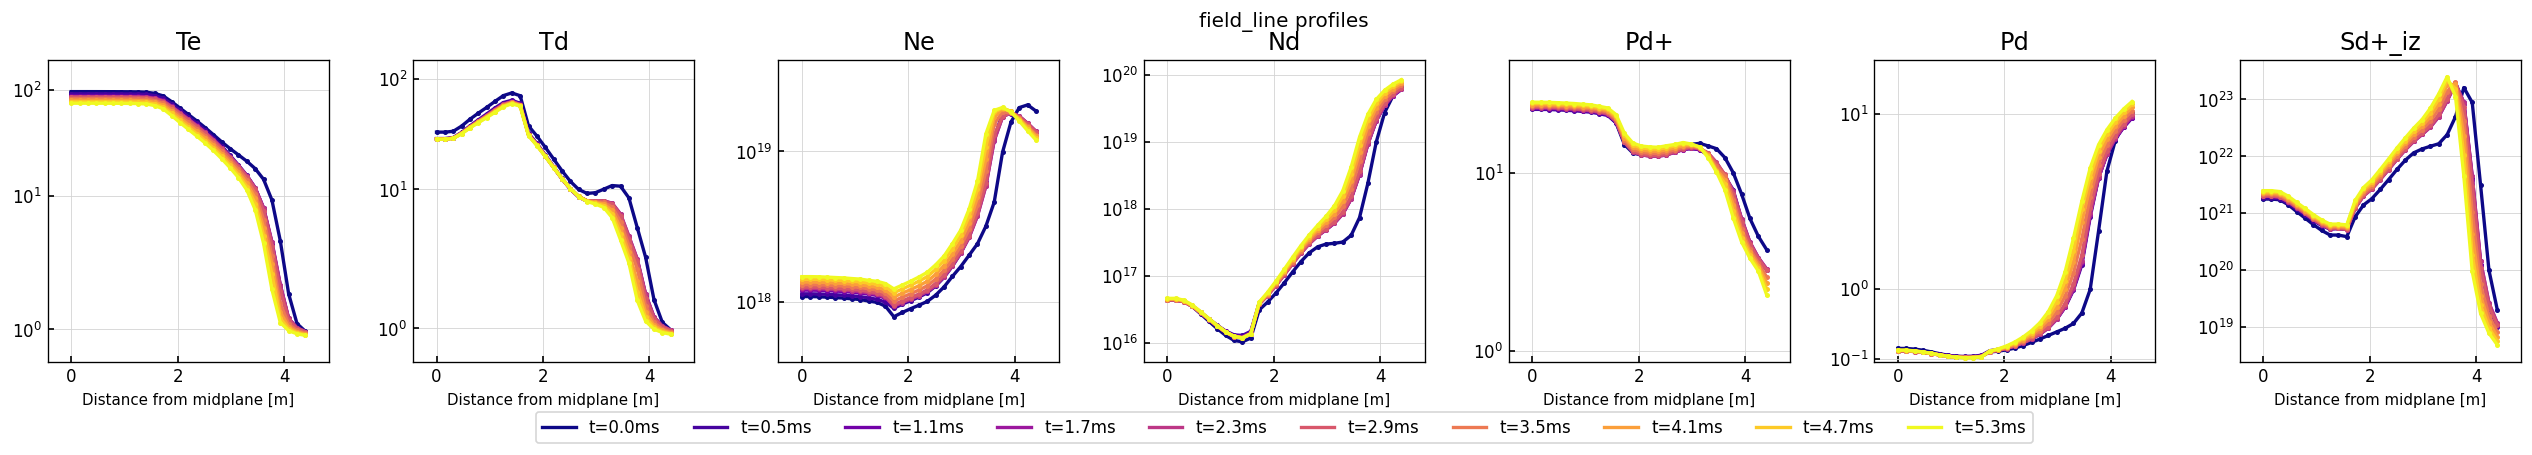

In [5]:
ds = cs["next-base"].ds

tlen = len(ds.coords["t"])
tres = 10
ts = np.linspace(0, tlen-1, tres, dtype = int)
colors = [plt.cm.get_cmap("plasma", tres)(x) for x in range(tres)]

toplot = {}
for t in ts:
    toplot[f"t={t/10}ms"] = ds.isel(t=t)
    
lineplot(
        toplot,
        clean_guards = True,
        params = ["Te", "Td", "Ne", "Nd", "Pd+", "Pd", "Sd+_iz"],
        # params = ["dv"],
        # regions = ["omp", "outer_lower", "field_line"],
        regions = ["field_line"],
        colors = colors,
    )

## Front tracking

In [ ]:
for name in cs:
# for name in ["addc_4x"]:
    cs[name].ds.hermesm.get_front_position(more_fronts = False)


76 106


c:\Users\Mike\OneDrive\Project\python-packages\sdtools\hermes3\front_tracking.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  df.index = range(ds.dims["t"])
c:\Users\Mike\OneDrive\Project\python-packages\sdtools\hermes3\front_tracking.py:48: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for t in range(ds.dims["t"]):


Text(0.5, 0, 't [ms]')

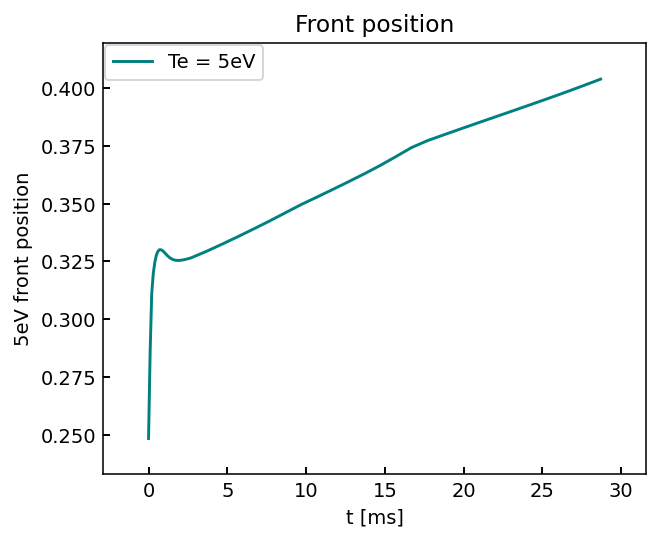

In [ ]:
# ds = cs["tune_4x"].ds

fig, ax = plt.subplots()
ax.plot((ds["t"] - ds["t"][0])*1000, ds["front_poldist_5eV"], label = "Te = 5eV")
# ds["front_poldist_5eV"].plot(ax = ax, label = "Te = 5eV")
# ds["front_poldist_Rpeak"].plot(ax = ax, label = "Radiation peak")
# ds["front_poldist_Nepeak"].plot(ax = ax, label = "Ne peak")
# ds["front_poldist_RECpeak"].plot(ax = ax, label = "Recombination peak")
ax.legend()
ax.set_ylabel("5eV front position")
ax.set_title("Front position")
ax.set_xlabel("t [ms]")

# Case analysis

(-2.1, -0.75)

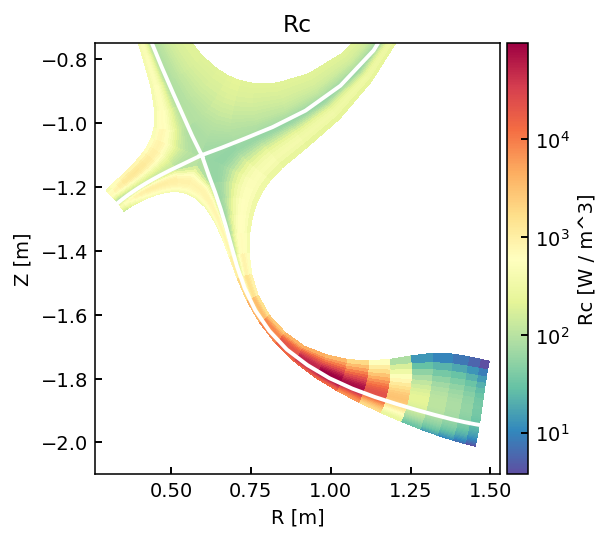

In [ ]:
ds = cs["tune"].ds.isel(t=-1)

fig, ax = plt.subplots()

ds["Rc"].hermesm.clean_guards().bout.polygon(ax = ax, cmap = "Spectral_r", logscale = True)
ax.set_ylim(-2.1, -0.75)

(-2.2, -0.5)

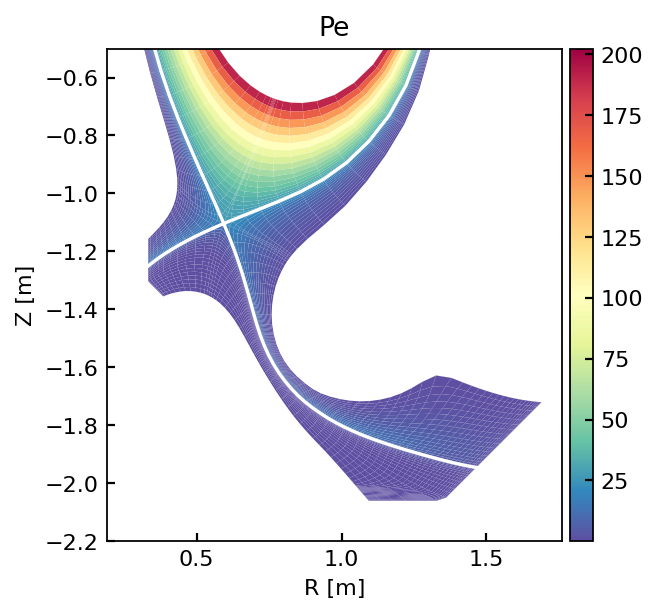

In [ ]:
fig, ax = plt.subplots(dpi = 160)

slc = store_slc["base"]
slc.plot_2d("Pe", ax = ax, vlim = )

ax.set_ylim(-2.2, -0.5)

# SOLPS comparison

In [91]:
hr.keys()

dict_keys(['next-base'])

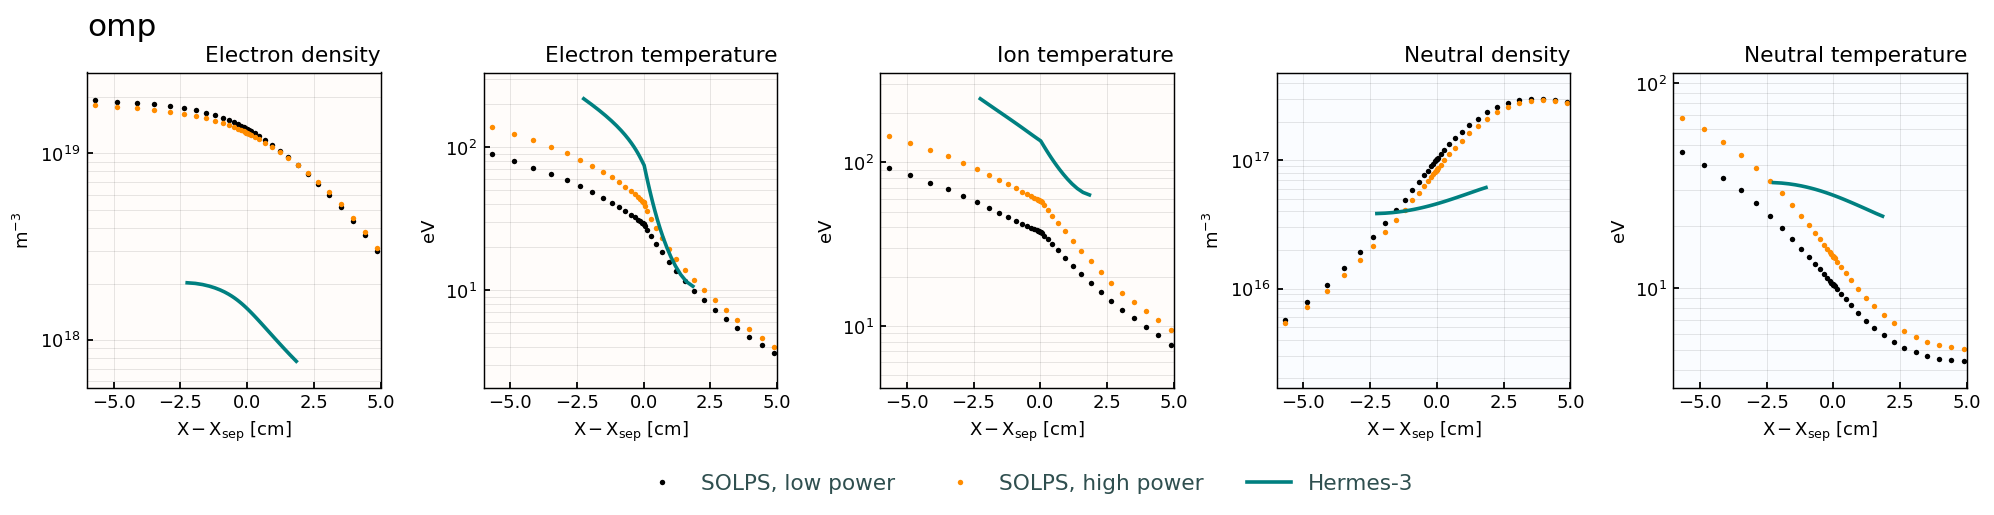

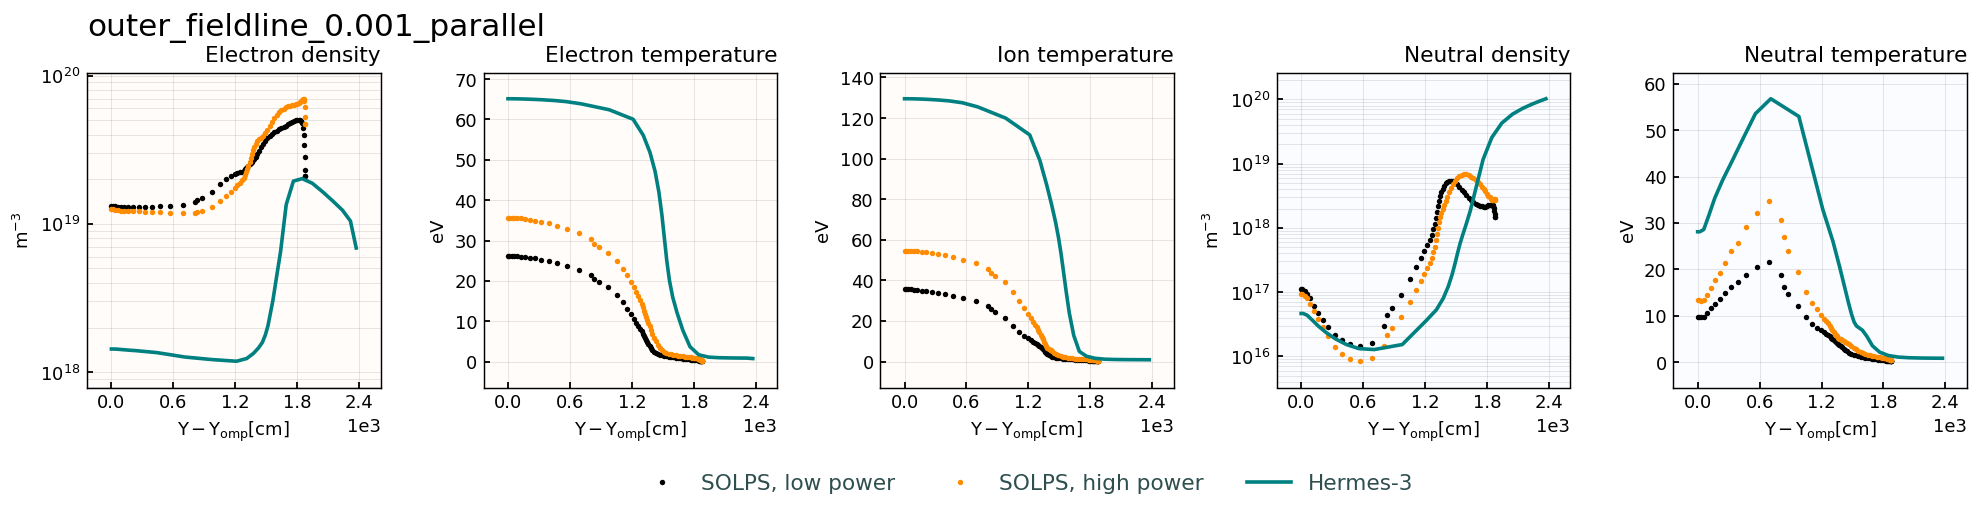

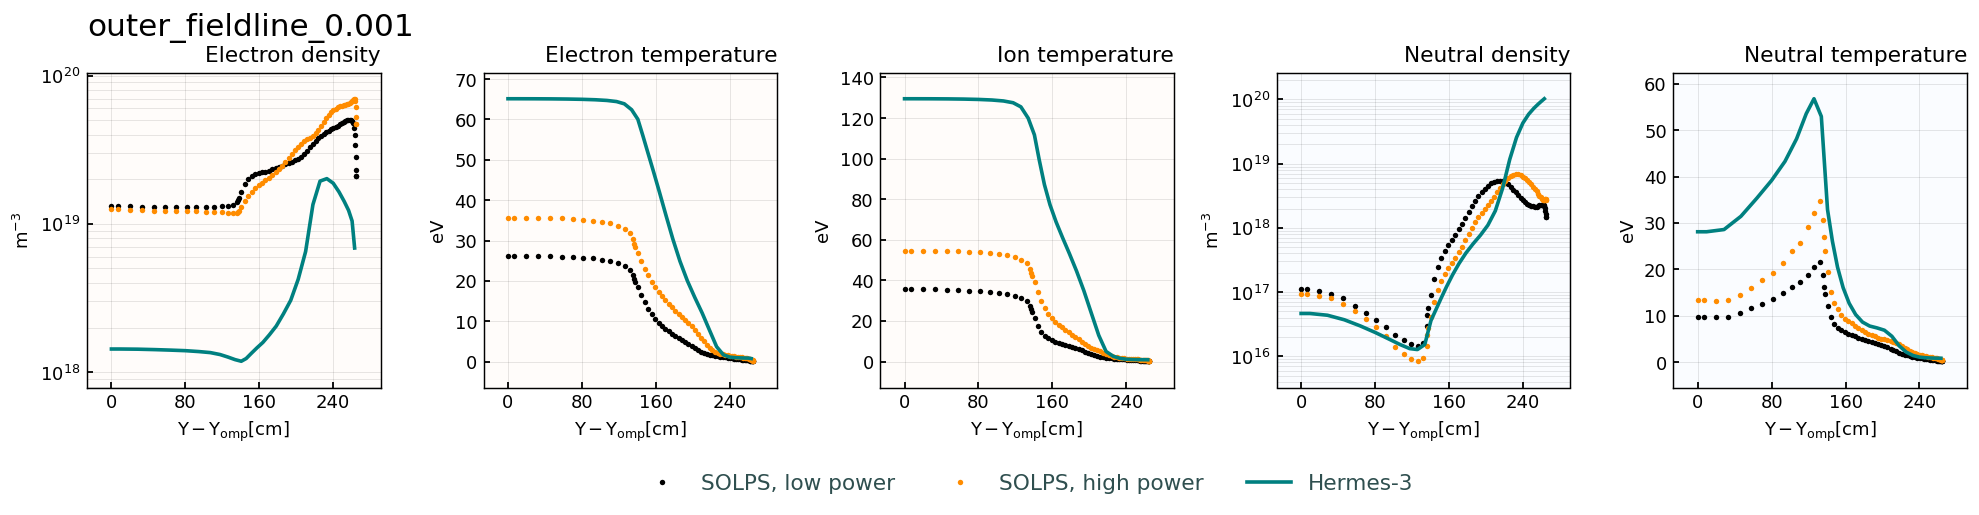

In [6]:
lineplot_compare(
    cases = { 
    "SOLPS, low power" : dict(data=sp["lopower"], color="black"),
    "SOLPS, high power" : dict(data=sp["hipower"], color="darkorange"),
    r"Hermes-3" : dict(data=hr['next-base'], color = "teal"),
    },
    regions = ["omp", "outer_fieldline_0.001_parallel", "outer_fieldline_0.001"],  
    # params = ["Pe", "Pd+", "Pa"],
    # params = ["Ne", "Te", "Td+", "Na", "Ta", "Pe", "Pd+", "Pa"],
    params = ["Ne", "Te", "Td+", "Na", "Ta"],
    mode = "log",
    dpi = 100,
    lw = 2,
    legend_nrows =1,
    combine_molecules = False
)

SyntaxError: invalid syntax (1580022871.py, line 2)

# EIRENE diags

In [16]:
path = r"C:\Users\Mike\OneDrive\Project\lot2_2d\Moulton MAST-U SOLPS runs\45456-Dec1523-seq-23\puff=1.5e21_pump=0.001_nodrifts_bcmom2_parmvsa2_redoutpfrtrans"
fort46 = read_ft46(where = path, save = False)

read_ft46: -- file version 20170930


## Get neutral pressures

In [18]:
# Norm from g cm^-2 s^-1 to kg m^-2 s^-1:
cgs_norm = 1e-3 * 1e4  
Gax = fort46["vxdena"][:,0] * cgs_norm  # [kg m^-2 s^-1]
Gay = fort46["vydena"][:,0] * cgs_norm  # [kg m^-2 s^-1]
Gaz = fort46["vzdena"][:,0] * cgs_norm  # [kg m^-2 s^-1]
Na = fort46["pdena"][:,0]    # Already in m^-3 thanks to Matteo routine
Ma = constants("mass_p")*2
Pastat = fort46["edena"][:,0]    # Already in Pa thanks to Matteo routine

Gmx = fort46["vxdenm"][:,0] * cgs_norm  # [kg m^-2 s^-1]
Gmy = fort46["vydenm"][:,0] * cgs_norm  # [kg m^-2 s^-1]
Gmz = fort46["vzdenm"][:,0] * cgs_norm  # [kg m^-2 s^-1]
Nm = fort46["pdenm"][:,0]    # Already in m^-3 thanks to Matteo routine
Mm = constants("mass_p")*2*2
Pmstat = fort46["edenm"][:,0]    # Already in Pa thanks to Matteo routine

# To get velocity:
# G = kg m^-2 s^-1
# G / Ma = m^-2 s^-1
# G / Ma / Na = m^-2 s^-1 * m^3 = Vn = ms^-1

Vax = Gax / Na / Ma
Vay = Gay / Na / Ma
Vaz = Gaz / Na / Ma

Padynx = 0.5 * Ma * Na * Vax**2
Padyny = 0.5 * Ma * Na * Vay**2
Padynz = 0.5 * Ma * Na * Vaz**2

Patot = Padynx + Padyny + Padynz + Pastat

Vmx = Gmx / Nm / Mm
Vmy = Gmy / Nm / Mm
Vmz = Gmz / Nm / Mm

Pmdynx = 0.5 * Mm * Nm * Vmx**2
Pmdyny = 0.5 * Mm * Nm * Vmy**2
Pmdynz = 0.5 * Mm * Nm * Vmz**2

Pmtot = Pmdynx + Pmdyny + Pmdynz + Pmstat

fort46["Padynx"] = Padynx
fort46["Padyny"] = Padyny
fort46["Padynz"] = Padynz
fort46["Pastat"] = Pastat
fort46["Patot"] = Patot

fort46["Pmdynx"] = Pmdynx
fort46["Pmdyny"] = Pmdyny
fort46["Pmdynz"] = Pmdynz
fort46["Pmstat"] = Pmstat
fort46["Pmtot"] = Pmtot
fort46["Na"] = Na


## 2D plot of atom velocities

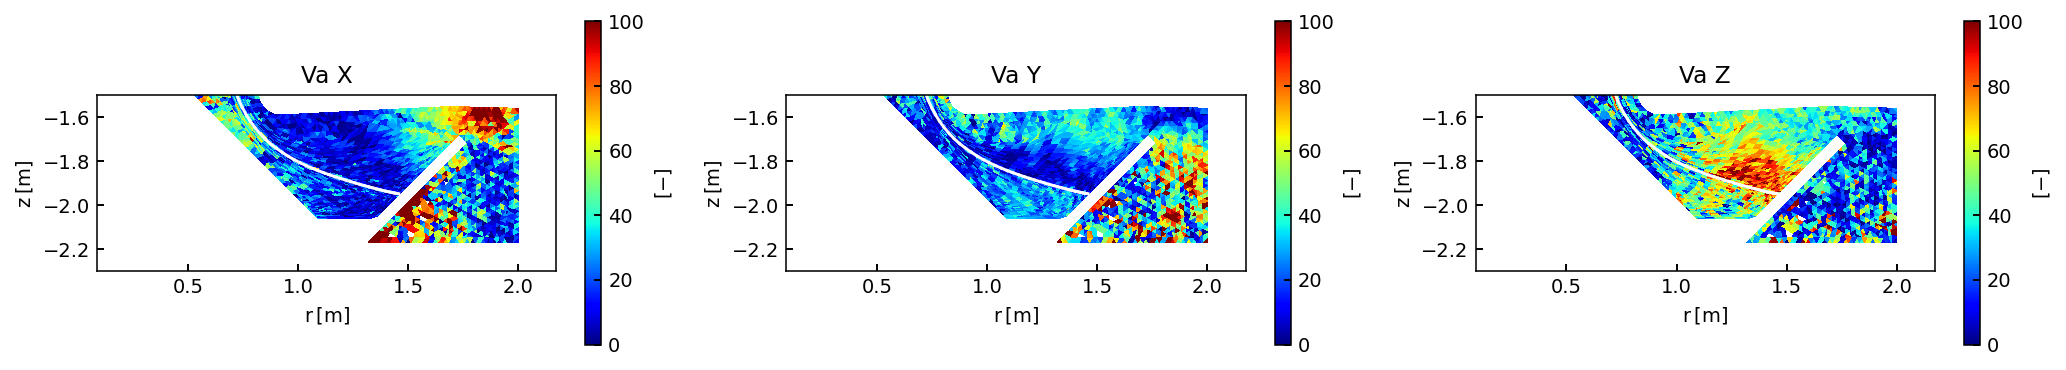

In [23]:
vmax = 0
vmin = 100
fig, axes = plt.subplots(1,3,figsize=(18,3))
scale = "linear"
cmap = "jet"
with HiddenPrints():
        
        # ax = axes[0]
        # plot_2d(fig = fig, ax = ax, scale = scale, where = [path], species = ["D"], what = ["vxdena"], cmap = cmap,
        #         vmin = vmin, vmax = vmax, value_override = Pastat)
        # ax.set_title("Pstat")
        
        ax = axes[0]
        plot_2d(fig = fig, ax = ax, scale = scale, where = [path], species = ["D"], what = ["vxdena"], cmap = cmap,
                vmin = vmin, vmax = vmax, value_override = abs(Vax)*1e-3)
        ax.set_title("Va X")

        ax = axes[1]
        plot_2d(fig = fig, ax = ax, scale = scale, where = [path], species = ["D"], what = ["vxdena"], cmap = cmap,
                vmin = vmin, vmax = vmax, value_override = abs(Vay)*1e-3)
        ax.set_title("Va Y")

        ax = axes[2]
        plot_2d(fig = fig, ax = ax, scale = scale, where = [path], species = ["D"], what = ["vxdena"], cmap = cmap,
                vmin = vmin, vmax = vmax, value_override = abs(Vaz)*1e-3)
        ax.set_title("Va Z")

for ax in axes:
        ax.set_ylim(-2.3, -1.5)


In [18]:
v = 1e5
R  = 1.2
omega = v / R
RPM = 30 * v / (np.pi * R)
print(f"The neutrals are spinning at {RPM:.0f} RPM")

The neutrals are spinning at 795775 RPM


## 2D plot of atom pressures

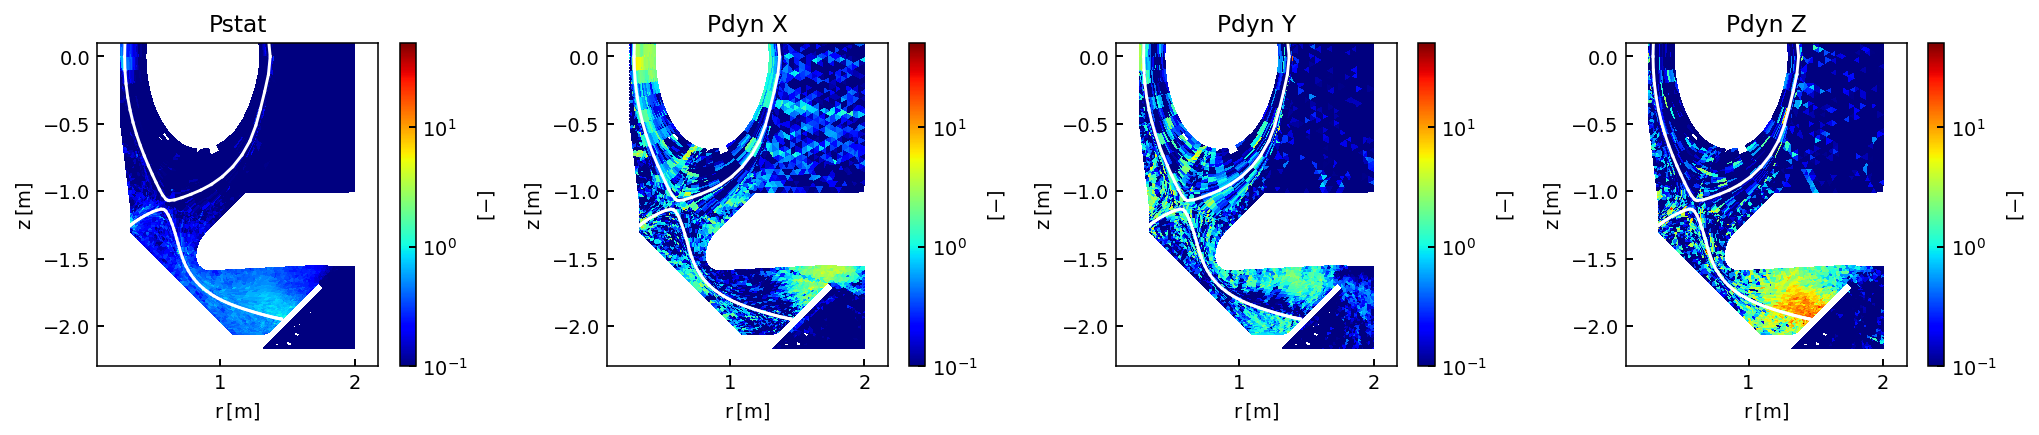

In [199]:
vmax = 50
vmin = 0.1
fig, axes = plt.subplots(1,4,figsize=(18,3))
scale = "log"
cmap = "jet"
with HiddenPrints():
        
        ax = axes[0]
        plot_2d(fig = fig, ax = ax, scale = scale, where = [path], species = ["D"], what = ["vxdena"], cmap = cmap,
                vmin = vmin, vmax = vmax, value_override = Pastat)
        ax.set_title("Pstat")
        
        ax = axes[1]
        plot_2d(fig = fig, ax = ax, scale = scale, where = [path], species = ["D"], what = ["vxdena"], cmap = cmap,
                vmin = vmin, vmax = vmax, value_override = Padynx)
        ax.set_title("Pdyn X")

        ax = axes[2]
        plot_2d(fig = fig, ax = ax, scale = scale, where = [path], species = ["D"], what = ["vxdena"], cmap = cmap,
                vmin = vmin, vmax = vmax, value_override = Padyny)
        ax.set_title("Pdyn Y")

        ax = axes[3]
        plot_2d(fig = fig, ax = ax, scale = scale, where = [path], species = ["D"], what = ["vxdena"], cmap = cmap,
                vmin = vmin, vmax = vmax, value_override = Padynz)
        ax.set_title("Pdyn Z")

for ax in axes:
        ax.set_ylim(-2.3, 0.1)


## 2D plot of molecule pressures

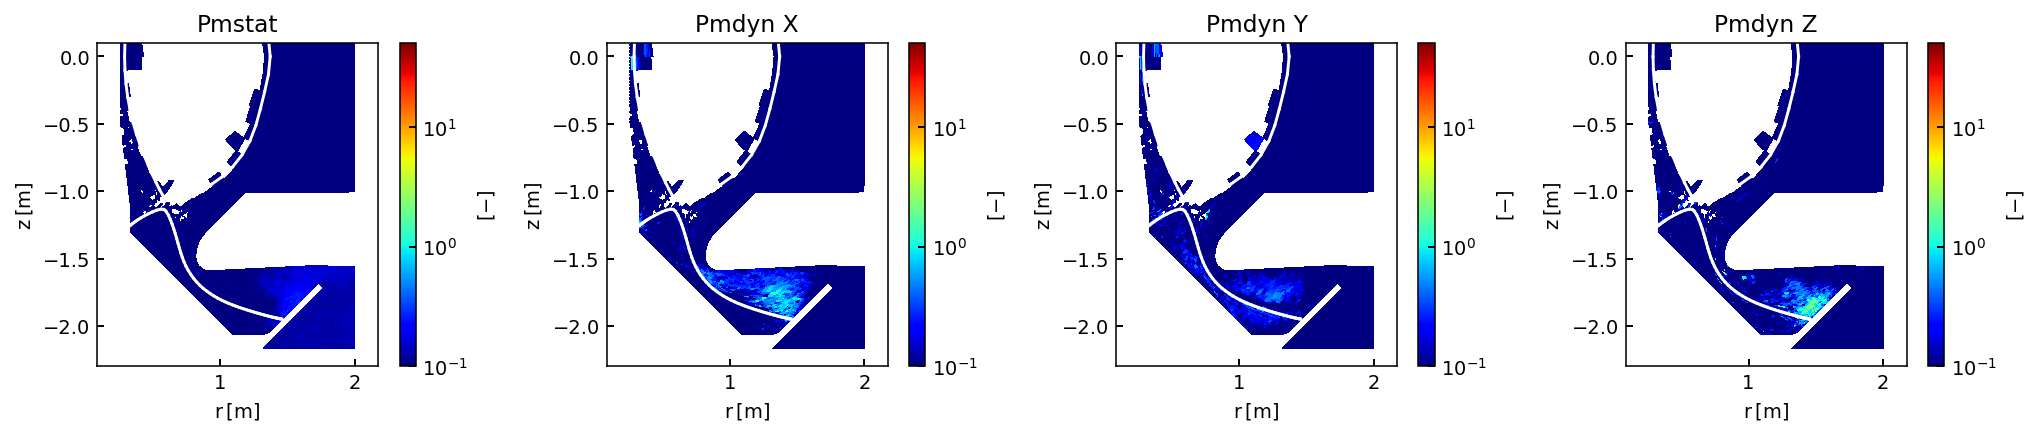

In [200]:
vmax = 50
vmin = 0.1
fig, axes = plt.subplots(1,4,figsize=(18,3))
scale = "log"
cmap = "jet"
with HiddenPrints():
        
        ax = axes[0]
        plot_2d(fig = fig, ax = ax, scale = scale, where = [path], species = ["D"], what = ["vxdena"], cmap = cmap,
                vmin = vmin, vmax = vmax, value_override = Pmstat)
        ax.set_title("Pmstat")
        
        ax = axes[1]
        plot_2d(fig = fig, ax = ax, scale = scale, where = [path], species = ["D"], what = ["vxdena"], cmap = cmap,
                vmin = vmin, vmax = vmax, value_override = Pmdynx)
        ax.set_title("Pmdyn X")

        ax = axes[2]
        plot_2d(fig = fig, ax = ax, scale = scale, where = [path], species = ["D"], what = ["vxdena"], cmap = cmap,
                vmin = vmin, vmax = vmax, value_override = Pmdyny)
        ax.set_title("Pmdyn Y")

        ax = axes[3]
        plot_2d(fig = fig, ax = ax, scale = scale, where = [path], species = ["D"], what = ["vxdena"], cmap = cmap,
                vmin = vmin, vmax = vmax, value_override = Pmdynz)
        ax.set_title("Pmdyn Z")

for ax in axes:
        ax.set_ylim(-2.3, 0.1)


## Line interpolation

In [171]:
def intep_tri_on_line(triangulation, data, X, Y):

    # Assume you have your triangulation and cell-centered values
    triang = triangulation  # Your existing triangulation object
    cell_values = data  # Assuming this has a value per triangle

    # Get number of nodes
    num_nodes = len(triang.x)

    # Initialize arrays for summing contributions and counting occurrences
    node_values = np.zeros(num_nodes)
    node_counts = np.zeros(num_nodes)

    # Loop through each triangle and distribute its value to its three nodes
    for tri_index, nodes in enumerate(triang.triangles):
        for node in nodes:
            node_values[node] += cell_values[tri_index]  # Add triangle value to node
            node_counts[node] += 1  # Count contributions to the node

    # Avoid division by zero (shouldn't happen in a well-formed triangulation)
    node_counts[node_counts == 0] = 1

    # Compute the final averaged node values
    node_values /= node_counts

    # Now node_values is node-centered and can be used for interpolation

    analyzer = tri.TriAnalyzer(triang)
    triangle_areas = analyzer.circle_ratios()  # Proxy for area weighting

    weighted_node_values = np.zeros(num_nodes)
    weighted_counts = np.zeros(num_nodes)

    for tri_index, nodes in enumerate(triang.triangles):
        area = triangle_areas[tri_index]
        for node in nodes:
            weighted_node_values[node] += cell_values[tri_index] * area
            weighted_counts[node] += area

    weighted_counts[weighted_counts == 0] = 1
    weighted_node_values /= weighted_counts  # Weighted average

    interp = tri.LinearTriInterpolator(triang, weighted_node_values)     # Noisy
    # interp = tri.CubicTriInterpolator(triang, weighted_node_values)      # Overfits, leads to "waves" in Nn
    # interp = scipy.interpolate.CloughTocher2DInterpolator(list(zip(triang.x, triang.y)), node_values)  # Also makes noise
    
    return interp(X,Y)
    


### Get tri data interpolated on line

Padynx
Padyny
Padynz
Pastat
Pmdynx
Pmdyny
Pmdynz
Pmstat


Text(0.5, 1.0, 'Interpolation check: Na')

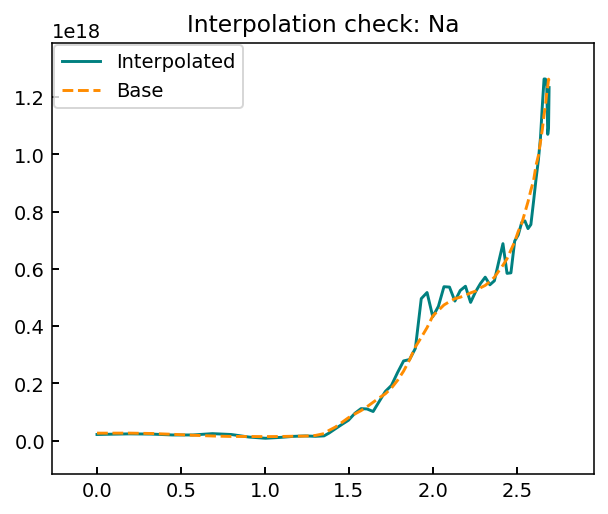

In [201]:
from gridtools.solps_python_scripts.read_triangle_mesh import read_triangle_mesh
from gridtools.solps_python_scripts.utilities.accessories import rearrange_quadrangles, rearrange_triangles

from scipy.interpolate import Rbf
import matplotlib.tri as tri

triangles = read_triangle_mesh(where = path, verbose = False, save = False)
cells = triangles['cells']  # Node indices of each triangle
nodes = triangles['nodes']  # X, Y coords of triangulated grid
triangulation = tri.Triangulation(nodes[:,0], nodes[:,1], cells)
cells = rearrange_triangles(cells = cells)


slc = store_slc["base"]
fl = slc.get_1d_poloidal_data(["Na", "Nn", "Nm", "Ta", "Tn", "Tm", "Pa", "Pn", "Pm", "Pe", "Pd+", "Vd+", "Ne"], sepadd = 0)
fl["Pidyn"] = 0.5 * constants("mass_p")*2 * fl["Ne"] * fl["Vd+"]**2

for param in ["Padynx", "Padyny", "Padynz", "Pastat", "Pmdynx", "Pmdyny", "Pmdynz", "Pmstat"]:
    print(param)
    fl[param] = intep_tri_on_line(triangulation = triangulation, data = fort46[param], X = fl["R"].values, Y = fl["Z"].values)
    
# For check
fl["Na_interp"] = intep_tri_on_line(triangulation = triangulation, data = fort46["Na"], X = fl["R"].values, Y = fl["Z"].values)

fig, ax = plt.subplots()
ax.plot(fl["Spol"], fl["Na_interp"], label = "Interpolated")
ax.plot(fl["Spol"], fl["Na"], label = "Base", ls = "--")
ax.legend()
ax.set_title("Interpolation check: Na")

In [ ]:
fl.columns

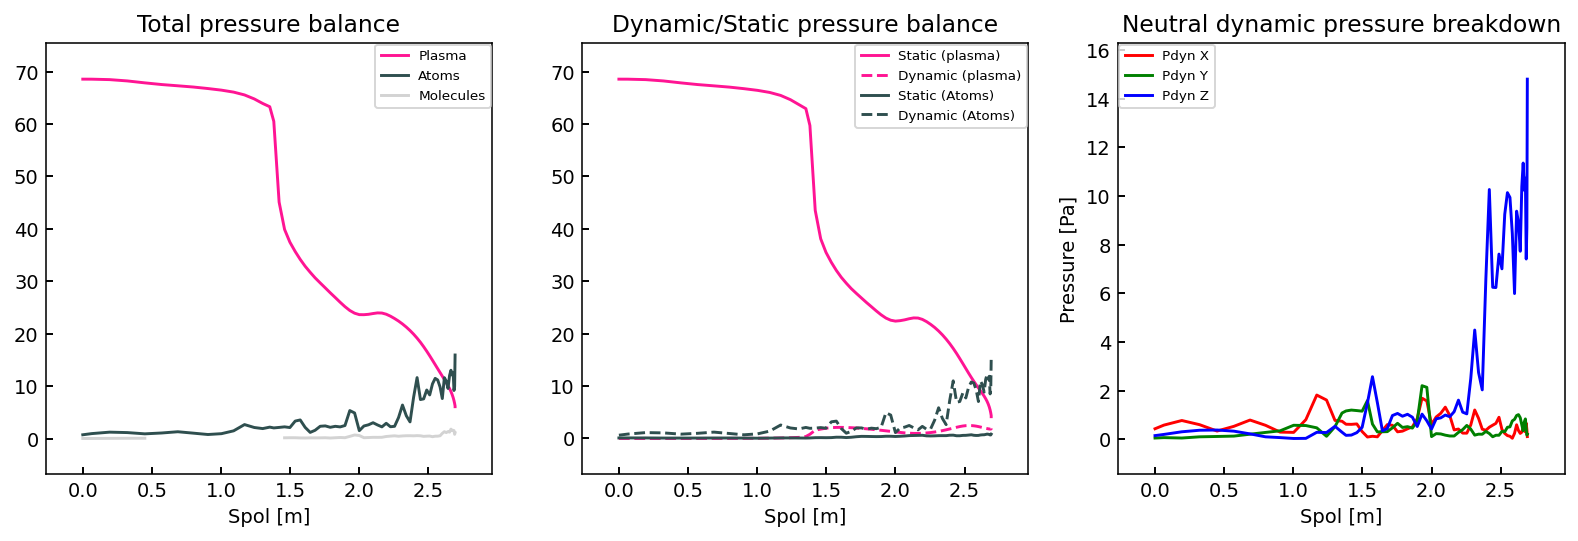

In [204]:
fl["Padyntot"] = fl["Padynx"] + fl["Padyny"] + fl["Padynz"] 
fl["Patot"] = fl["Padyntot"] + fl["Pastat"]
fl["Pmdyntot"] = fl["Pmdynx"] + fl["Pmdyny"] + fl["Pmdynz"] 
fl["Pmtot"] = fl["Pmdyntot"] + fl["Pmstat"]

c_ion = "tomato"
c_electron = "skyblue"
c_atom = "darkslategrey"
c_molecule = "lightgrey"
c_plasma = "deeppink"


fig, axes = plt.subplots(1,3, figsize = (14,4))

ax = axes[0]
ax.set_title("Total pressure balance")
ax.plot(fl["Spol"], fl["Pe"] + fl["Pd+"] + fl["Pidyn"], label = "Plasma", c = c_plasma)
ax.plot(fl["Spol"], fl["Patot"], c = c_atom, label = "Atoms")
ax.plot(fl["Spol"], fl["Pmtot"], c = c_molecule, label = "Molecules")

ax = axes[1]
ax.set_title("Dynamic/Static pressure balance")
ax.plot(fl["Spol"], fl["Pe"] + fl["Pd+"], label = "Static (plasma)", c = c_plasma)
ax.plot(fl["Spol"], fl["Pidyn"], label = "Dynamic (plasma)", c = c_plasma, ls = "--")
ax.plot(fl["Spol"], fl["Pastat"], label = "Static (Atoms)", c = c_atom)
ax.plot(fl["Spol"], fl["Padyntot"], label = "Dynamic (Atoms)", c = c_atom, ls = "--")

ax = axes[2]
ax.set_title("Neutral dynamic pressure breakdown")
ax.plot(fl["Spol"], fl["Padynx"], label = "Pdyn X", c = "r")
ax.plot(fl["Spol"], fl["Padyny"], label = "Pdyn Y", c = "g")
ax.plot(fl["Spol"], fl["Padynz"], label = "Pdyn Z", c = "b")

# ax.plot(fl["Spol"], fl["Pe"], label = "Pstat_e", c = c_electron)
# ax.plot(fl["Spol"], fl["Pd+"], label = "Pstat_i", c = c_ion)
# ax.plot(fl["Spol"], fl["Pd+_dyn"], label = "Pdyn_i", c = c_ion, ls = "--")
# ax.plot(fl["Spol"], fl["Pa"], label = "Pstat_n", c = "darkslategrey")


ax.set_ylabel("Pressure [Pa]")
for ax in axes:
    ax.set_xlabel("Spol [m]")
    ax.legend(fontsize = "x-small")


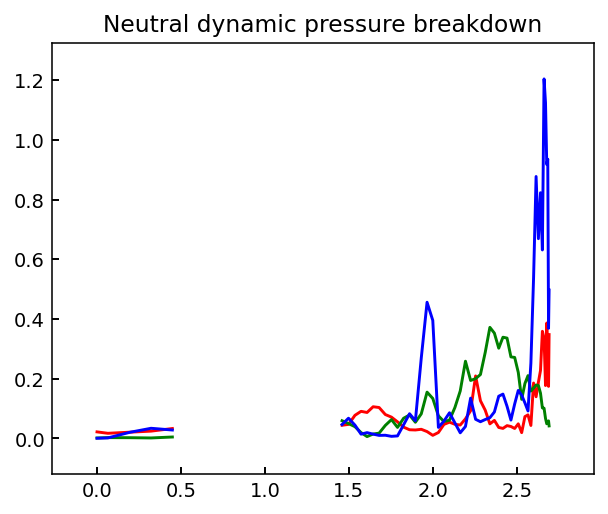

In [205]:
fig, ax = plt.subplots()

ax.set_title("Neutral dynamic pressure breakdown")
ax.plot(fl["Spol"], fl["Pmdynx"], label = "Pdyn X", c = "r")
ax.plot(fl["Spol"], fl["Pmdyny"], label = "Pdyn Y", c = "g")
ax.plot(fl["Spol"], fl["Pmdynz"], label = "Pdyn Z", c = "b")

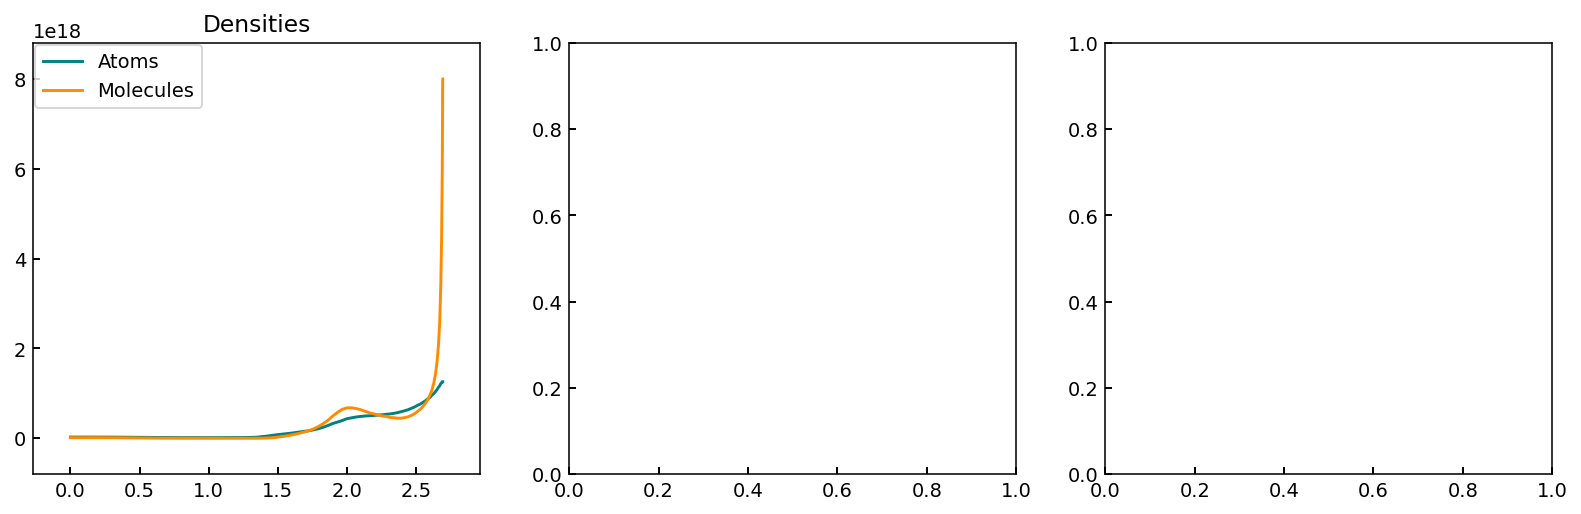

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (14,4))

ax = axes[0]
ax.set_title("Densities")
ax.plot(fl["Spol"], fl["Na"], label = "Atoms")
ax.plot(fl["Spol"], fl["Nm"], label = "Molecules")

ax = axes[1]
ax.set_title("Pressures")
ax.plot(fl["Spol"], fl["Pa"], label = "Atoms")
ax.plot(fl["Spol"], fl["Pm"], label = "Molecules")

ax.legend()

In [178]:
fl["Spol"]

0     0.000000
1     0.064779
2     0.193964
3     0.321956
4     0.448785
        ...   
62    2.678944
63    2.685005
64    2.689688
65    2.692942
66    2.692974
Name: Spol, Length: 67, dtype: float64

(-2.3, 0.1)

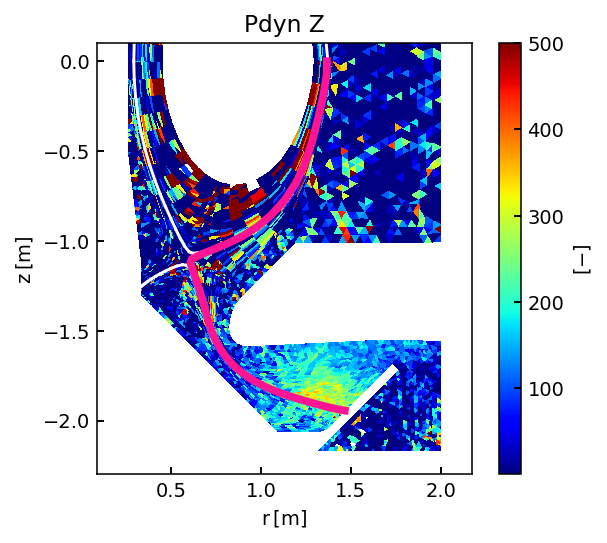

In [ ]:

fig, ax = plt.subplots()


ax.set_aspect("equal")

with HiddenPrints():
    plot_2d(fig = fig, ax = ax, scale = "linear", where = [path], species = ["D"], what = ["vxdena"],
                    vmin = vmin, vmax = vmax, value_override = Pdynz, separatrix = False)
    
ax.plot(fl["R"], fl["Z"], label = "SOLPS", c = "deeppink", lw = 4)
ax.set_title("Pdyn Z")
ax.set_ylim(-2.3, 0.1)
# fl

In [85]:
triangulation.triangles.shape

(20081, 3)

In [90]:
weighted_node_values.shape

(10488,)

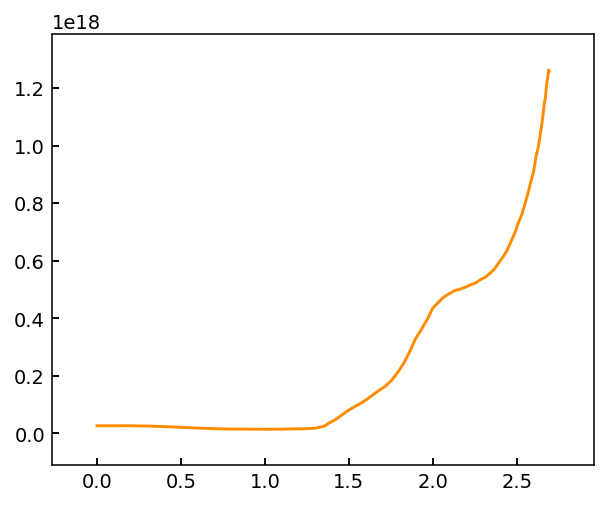

In [ ]:


fig, ax =plt.subplots()
ax.plot(fl["Spol"], fl["Nn_interp"])
ax.plot(fl["Spol"], fl["Na"])



In [29]:
data.shape

(20081,)

In [22]:
nodes

array([[ 2.        , -0.0479524 ],
       [ 2.        ,  0.        ],
       [ 2.        ,  0.0479524 ],
       ...,
       [ 1.67199822, -1.73450632],
       [ 1.67522951, -1.73477049],
       [ 1.68962371,  1.72041176]])

In [21]:
nodes[:,0].shape

(10488,)

In [20]:
cells[5,:]

array([1080, 1081, 1082])

In [17]:
fort46["vxdena"].shape

(20081, 2)

In [30]:
def map_to_SOLPS_grid(data, key, solps = {}, is_uedge = False):

	from raysect.core.math.function.float import Discrete2DMesh

	if is_uedge:
		(triangle_data, vertex_coords, triangles) = to_triangles(nsp = 1, vs = data[key], b2fgmtry = data["b2fgmtry"])
	else:
		vertex_coords = data["triangles"]["nodes"]
		triangles = data["triangles"]["cells"]
		triangle_data = data[key]

	if len(triangle_data.shape) == 1: triangle_data = np.reshape(triangle_data, (triangle_data.shape[0],1))

	f2d = Discrete2DMesh(vertex_coords = vertex_coords,
						 triangles = triangles,
						 triangle_data = np.reshape(triangle_data, (triangle_data.shape[0],)),
						 limit = False, default_value = 0.0)
 
map_to_SOLPS_grid(fort46, "Pdynx")

ModuleNotFoundError: No module named 'raysect'

In [ ]:

 
def to_triangles(nsp = None, vs = None, b2fgmtry = None, is_SOLEDGE = False):

	"""

	to_triangles create a triangulation starting from the quadrangular
	B2 mesh (to simplify plotting and homogenise with plot_eirene)

	From each B2 quadrangle, 2 triangles are obtained (EIRENE-mesh-like)
	=> each value in the quadrangular cell centre must be duplicated

	# Author: Matteo Moscheni
    # E-mail: matteo.moscheni@tokamakenergy.co.uk
    # February 2022

	"""

	if not is_SOLEDGE:

		cells = []
		nodes = []
		value = []
		inode = 0

		for ix in range(b2fgmtry['nx']):
			for iy in range(b2fgmtry['ny']):

				# first triangle

				nodes += [[b2fgmtry['crx'][ix,iy,1], b2fgmtry['cry'][ix,iy,1]]]
				nodes += [[b2fgmtry['crx'][ix,iy,3], b2fgmtry['cry'][ix,iy,3]]]
				nodes += [[b2fgmtry['crx'][ix,iy,2], b2fgmtry['cry'][ix,iy,2]]]

				cells += [[inode, inode + 1, inode + 2]]

				inode += 3

				# second triangle

				nodes += [[b2fgmtry['crx'][ix,iy,2], b2fgmtry['cry'][ix,iy,2]]]
				nodes += [[b2fgmtry['crx'][ix,iy,0], b2fgmtry['cry'][ix,iy,0]]]
				nodes += [[b2fgmtry['crx'][ix,iy,1], b2fgmtry['cry'][ix,iy,1]]]

				cells += [[inode, inode + 1, inode + 2]]

				inode += 3

				# duplicate values

				if nsp > 1:
					add = np.zeros(nsp)
					for isp in range(vs.shape[2]):
						add[isp] = vs[ix,iy,isp]
					value += [add]
					value += [add] # 2 triangles in 1 quadrangle
				else:
					value += [vs[ix,iy]]
					value += [vs[ix,iy]] # 2 triangles in 1 quadrangle

In [23]:
path = r"C:\Users\Mike\OneDrive\Project\lot2_2d\Moulton MAST-U SOLPS runs\45456-Dec1523-seq-23\puff=1.5e21_pump=0.001_nodrifts_bcmom2_parmvsa2_redoutpfrtrans"

vars = []
with open(os.path.join(path,"fort.44"), "r") as f:
    for line in f:
        if "*eirene data field" in line:
            vars.append(line.split()[3])
            
            


In [25]:
[print(x) for x in vars if "VX" in x]

[]

In [48]:
fort46 = read_ft46(where = path)


read_ft46: -- file version 20170930


In [67]:

from solps_python_scripts.solps_plot import PlotSolps2D

fig, ax = plt.subplots()
PlotSolps2D(keys = ["te"], cases = [path], save = False)

b2fgmtry loaded from .pkl
b2fstate loaded from .pkl

   b2fplasmf not up-to-date!


   b2fplasmf not up-to-date!

   Generating b2fplasmf from b2fplasma...


b2fstate loaded from .pkl
fort.44 loaded from .pkl
fort.46 loaded from .pkl
read_b2wdat_iout_4...
Failed to read custom variables in read_b2wdat_iout_4


KeyError: 'b2trcl_luciani_fllim_cvsahzx001'

In [43]:
fort46["vxdena"].shape

(20081, 2)

In [ ]:
fid = open(os.path.join(path, "fort.44"), "r")

read_ft44_rfield(fid, )

fid.close()

In [10]:
hr.keys()

dict_keys(['next-base'])

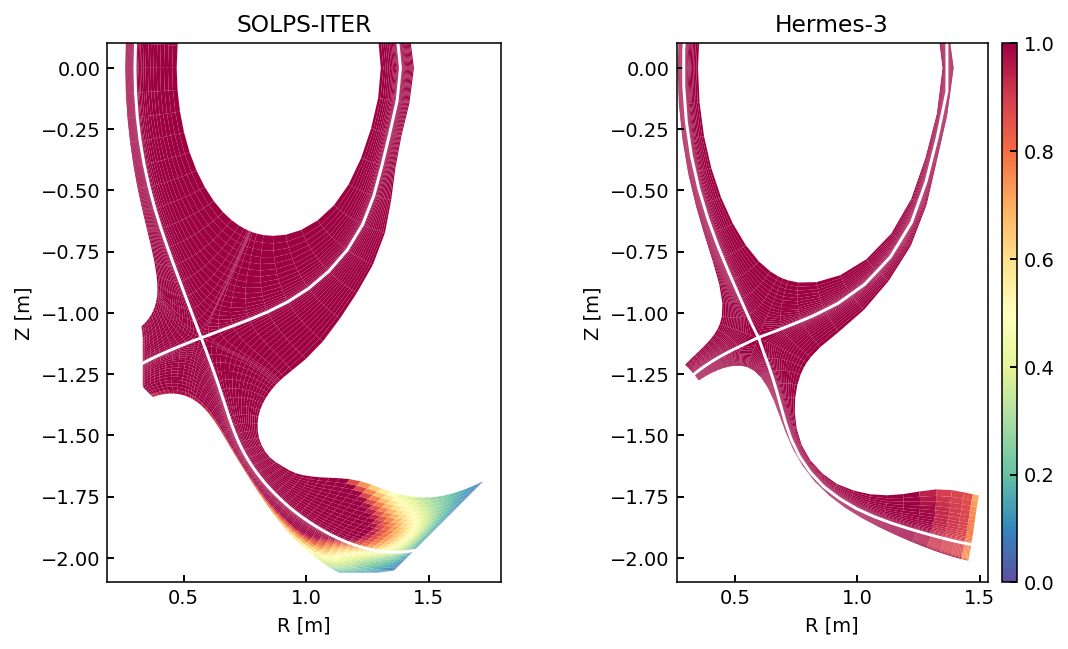

In [8]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
from hermes3.utils import create_norm
norm = create_norm(False, None, 0, 1)

## SOLPS
slc = store_slc["lopower"]
slc.plot_2d("Te", norm = norm,  cbar = False, logscale = False, ax = axes[0], antialias = True)


## Hermes-3
ds = cs["next-base"].ds.isel(t=-1)
(ds["Te"]).hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "Spectral_r", logscale = False, add_colorbar = False, norm = norm, antialias = True,
separatrix_kwargs = dict(color = "white", linestyle = "solid"), targets = False)

for ax in axes.flatten():
    # ax.set_xlim(0.2, 0.65)
    ax.set_ylim(-2.1, 0.1)
    ax.set_xlabel("R [m]")
    ax.set_ylabel("Z [m]")
    
    
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mpl.cm.ScalarMappable(norm = norm, cmap = "Spectral_r"), cax = cax, label = "", extend = "neither")
    
axes[0].set_title("SOLPS-ITER")
# axes[1].set_title("SOLEDGE2D")
axes[1].set_title("Hermes-3")
fig.subplots_adjust(wspace = 0)